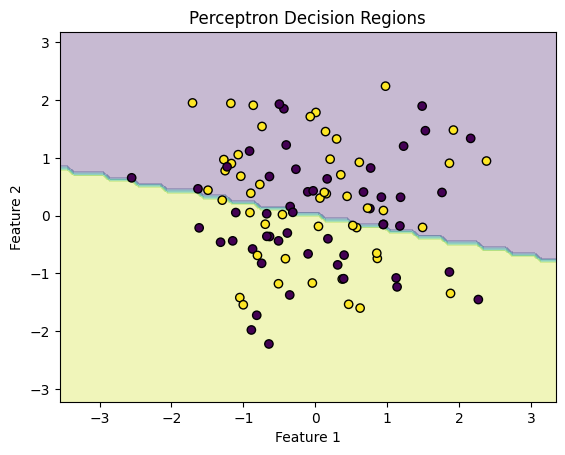

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, lr=0.1, epochs=20):
        self.W = np.random.rand(input_size)
        self.lr = lr
        self.epochs = epochs

    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        Z = np.dot(X, self.W)
        a = np.where(Z >= 0, 1, 0)
        return a

    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = X[i]
                y = self.predict(x)
                e = d[i] - y
                self.W += self.lr * e * x

# Generate random data points
np.random.seed(0)
X = np.random.randn(100, 2)  # 100 points, 2 features
d = np.random.randint(0, 2, size=100)  # Binary labels

# Create and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.fit(X, d)

# Visualize decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))
Z = perceptron.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=d, marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Regions')
plt.show()


